In [4]:
import random
import pandas
import numpy

  - Original [article](https://www.researchgate.net/publication/7326312_Skilled_or_Unskilled_but_Still_Unaware_of_It_How_Perceptions_of_Difficulty_Drive_Miscalibration_in_Relative_Comparisons) 
  - Blog with explanations: https://drbenvincent.medium.com/the-dunning-kruger-effect-probably-is-real-9c778ffd9d1b

In [5]:

def simulate_dunning_kruger_effect(size: int, bias: float, sig_o: float, sig_s: float):
    true_ability_scores = pandas.Series([random.gauss(mu=0.0, sigma=1.0) for count in range(size)])
    difference_observed_ability = pandas.Series([random.gauss(mu=0.0, sigma=sig_o) for count in range(size)])
    difference_perceived_ability = pandas.Series([random.gauss(mu=bias, sigma=sig_s) for count in range(size)])

    observed_ability_scores = true_ability_scores + difference_observed_ability
    
    perceived_ability_scores = true_ability_scores + difference_perceived_ability
            
    quartiles = numpy.digitize(observed_ability_scores, numpy.percentile(observed_ability_scores, [25, 50, 75])) + 1
    
    return pandas.DataFrame({
        'true_ability_scores': true_ability_scores,
        'observed_ability_scores': observed_ability_scores,
        'perceived_ability_scores': perceived_ability_scores,
        'quartiles': pandas.Series(quartiles)
    }
    )


In [6]:
model_data = simulate_dunning_kruger_effect(size=10000, bias=0.2, sig_o=1., sig_s=1.)

<AxesSubplot:>

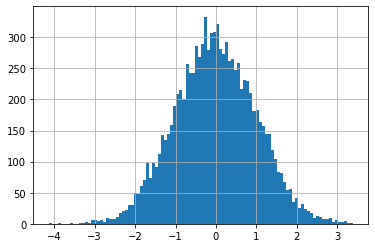

In [7]:
model_data['true_ability_scores'].hist(bins=100)

<AxesSubplot:>

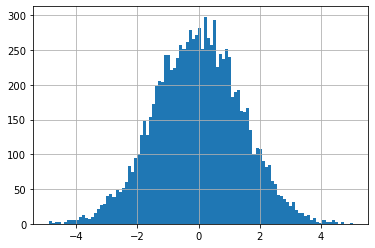

In [8]:
model_data['observed_ability_scores'].hist(bins=100)

<AxesSubplot:>

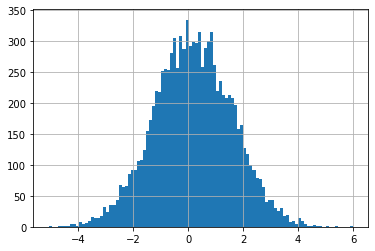

In [9]:
model_data['perceived_ability_scores'].hist(bins=100)

<AxesSubplot:xlabel='quartiles'>

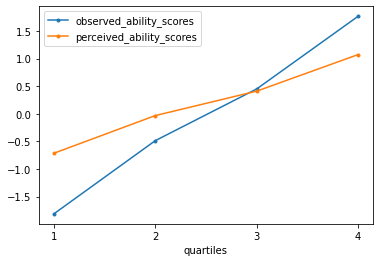

In [10]:
chart_data = model_data.groupby('quartiles').mean()
chart_data[['observed_ability_scores', 'perceived_ability_scores']].plot(xticks=(1, 2, 3, 4), style='.-')